In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import csv

In [5]:
fname = 'data/lur_no2/lur_no2_merged_with_pop_v10.csv'

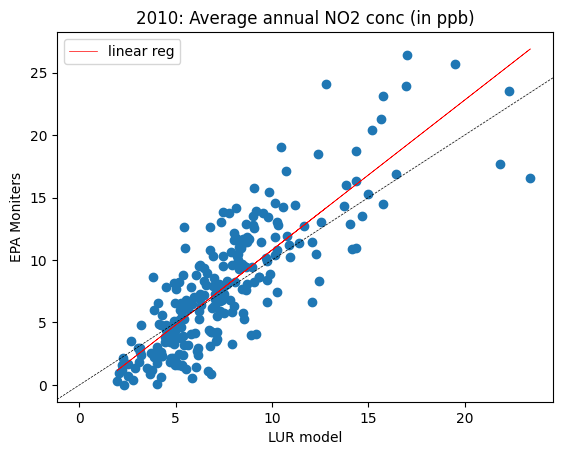

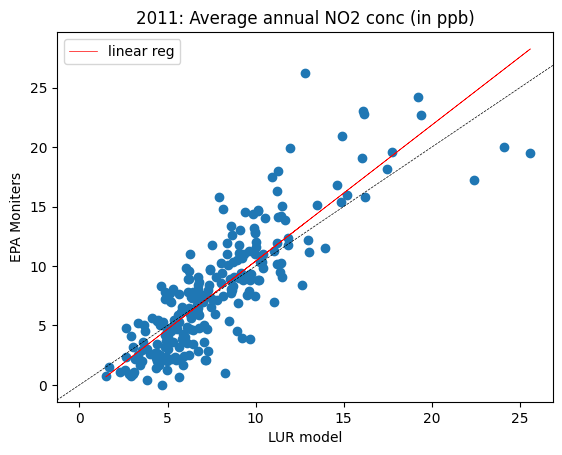

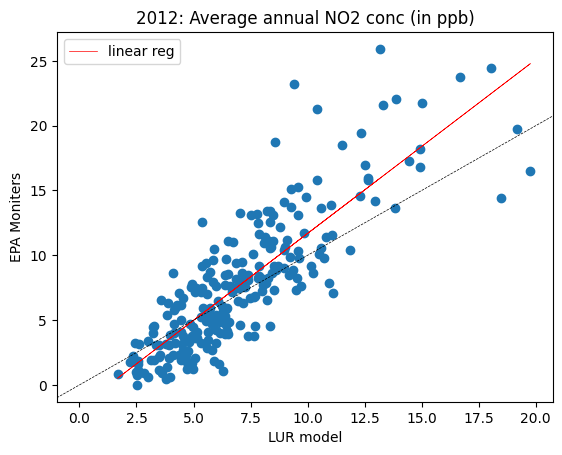

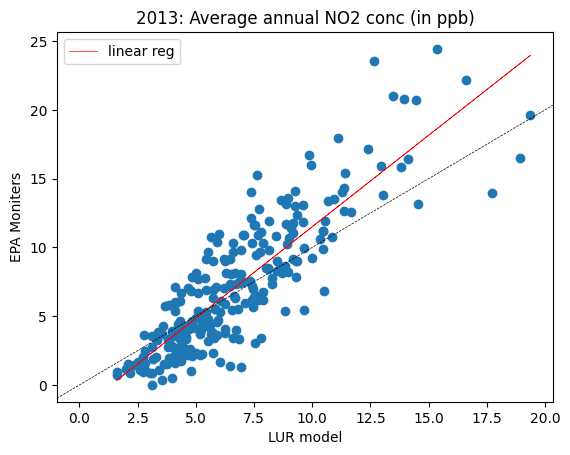

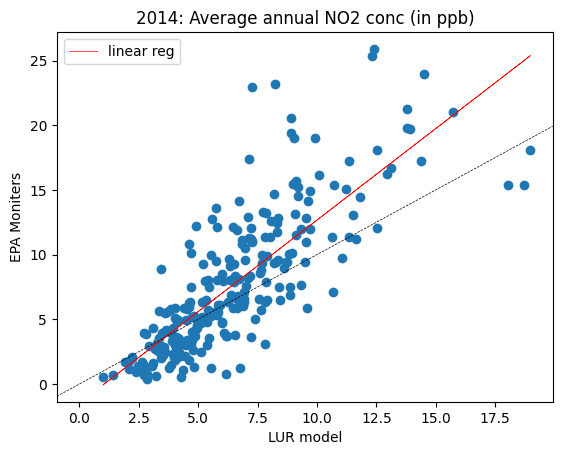

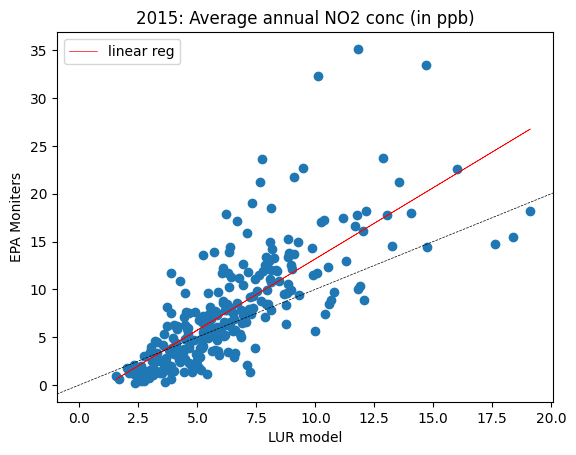

In [40]:
def get_reg(x, y):
    x = [[i] for i in x]
    regressor = LinearRegression() 
    regressor.fit(x, y) 
    y_pred = regressor.predict(x)
    return x, y_pred, regressor

writef = "lur_epa_reg_res.csv"
f = open(writef, "w", newline='')
writer = csv.writer(f)
mdf = pd.read_csv(fname)
for year in range(2010, 2016):
    df = mdf[mdf['year'] == year]
    df = df[(~pd.isna(df['pred_wght_y'])) & (~pd.isna(df['pred_wght_x']))]
    plt.close()
    x, y = df['pred_wght_x'], df['pred_wght_y']
    plt.scatter(x, y)
    _, y_pred, regressor = get_reg(x, y)
    plt.plot(x, y_pred,color='r', label='linear reg', linewidth=0.5) 
    ax = plt.gca()
    ax.axline((0, 0), slope=1, linestyle='--', linewidth=0.5, color='k')
    c1, i1 = regressor.coef_[0], regressor.intercept_
    
    _, y_pred, regressor = get_reg(y, x)
    c2, i2 = regressor.coef_[0], regressor.intercept_
    writer.writerow([year, c1, i1, c2, i2])
    

    plt.xlabel("LUR model")
    plt.ylabel("EPA Moniters")
    plt.title("{}: Average annual NO2 conc (in ppb)".format(year))
    plt.legend(loc='upper left')
    plt.savefig("{}_lur_vs_epa.png".format(year), bbox_inches='tight')
    plt.show()
f.close()

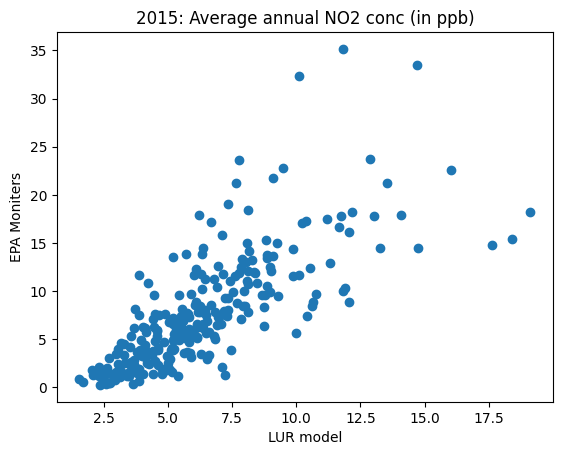

In [17]:
df = pd.read_csv(fname)
year = 2015
df = df[df['year'] == year]
df = df[~pd.isna(df['pred_wght_y'])]
plt.scatter(df['pred_wght_x'], df['pred_wght_y'])
plt.xlabel("LUR model")
plt.ylabel("EPA Moniters")
plt.title("2015: Average annual NO2 conc (in ppb)")
plt.savefig("2015_lur_vs_epa.png", bbox_inches='tight')